In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('default')
plt.style.use('dark_background')

In [33]:
likers = pd.read_csv('egg_likers.csv')

likers.shape

(100000, 25)

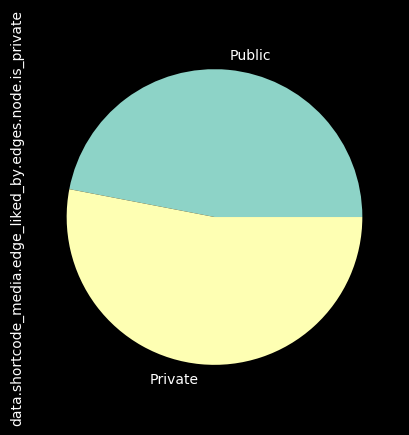

In [44]:
likers['data.shortcode_media.edge_liked_by.edges.node.is_private'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='pie', labels=['Public', 'Private'])

In [35]:
email_regex = """(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

email_users = likers.loc[likers['data.shortcode_media.edge_liked_by.edges.node.full_name'].str.count(email_regex) > 0].copy()
email_users.shape[0]

14

In [36]:
likers['username_length'] = likers['data.shortcode_media.edge_liked_by.edges.node.username'].str.count('')
likers['username_length'] = np.where(
    likers['username_length'] > 255,
    255,
    likers['username_length']
)

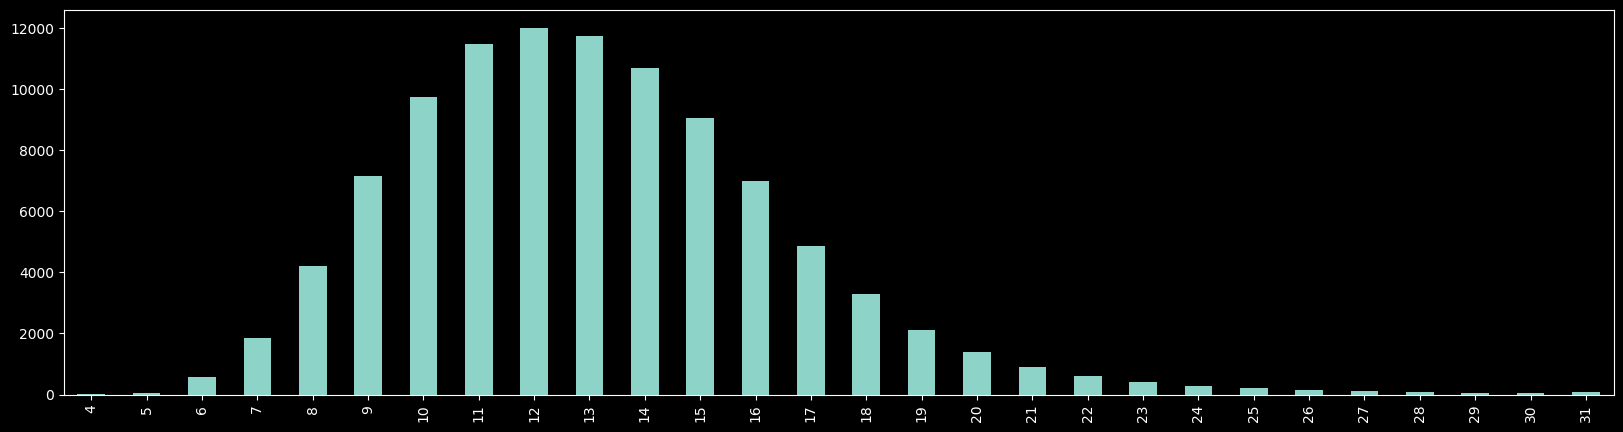

In [38]:
likers['username_length'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))